In [2]:
# import packages
import xarray as xr
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import cartopy.crs as ccrs    # mapping projections
import cartopy.feature as cf  # mapping features
import cmocean                # colormap 


plt.rcParams['font.size'] = 16

In [8]:
#create a nested for loop to iterate through the dates (year, month and day separately) and construct a file name including the new day to be analyzed.
#This weeks goal: be able to plot this same SST data over multiple days using a for loop
# load dataset
#...MODIS.{year}.{month}.{day}.L3m...
                                    # chose day to load
days = np.arange(1,32,1) # creates array with step=1 within the half-open interval [start=1, stop=32)
months = np.arange(1,13,1)
years = np.arange(2000,2022,1)

date = ""
dates = []

for i in years: #iterate through years (i)
    for j in months: #iterate through months (j)
        
        if((j == 4 or j == 6 or j == 9 or j == 11)):  #if the month is april, june, september or november
            for k in days:                            #iterate through the 30 days of the month
                if(k == 30):
                    break
                else:
                    date = str(i) + str(j).zfill(2) + str(k).zfill(2)   # str converts number to string; '+' concatenates strings; zfill(2) fills string with zeros at the beginning until it has number of characters =2 i.e. to accommodate for days and months <10
                    dates.append(date)
                    date = ""
                
        elif(j == 2 and (i % 4) == 0):               #if the month is february and it is a LEAP YEAR (modulo 4)
            for k in days:                           #iterate through the 28 days of the month
                if (k == 29):                        # last day to be included is 28  
                    break
                else:
                    date = str(i) + str(j).zfill(2) + str(k).zfill(2)       
                    dates.append(date)                 
                    date = ""                         #resets day to an empty string
                
        elif(j == 2 and (i % 4) != 0):               #if the month is february and it is NOT a LEAP YEAR (modulo 4)
            for k in days:                           #iterate through the 29 days of the month
                if k == 30:                          # last day to be included is 29
                    break
                else:
                    date = str(i) + str(j).zfill(2) + str(k).zfill(2)
                    dates.append(date)
                    date = ""
        else:                                         #if the month is any month with 31 days
            for k in days:                            #iterate through the 31 days of the month
                    date = str(i) + str(j).zfill(2) + str(k).zfill(2)
                    dates.append(date)
                    date = ""

    #print(dates)

#file_name =   # construct string with file name
#date_files.append(file_name)

  
#enclose the histogram code in a for loop?
#retrieve one value from each file

NameError: name 'date_files' is not defined

In [9]:
def concatenate(i, j, k):
    concat = srt(i)                      #concatenate 'i'(year) onto the string
    if(j < 10):                      #if the month digit is not a two-digit number
        concat += (str(0) + str(j)         #concatenate 'j'(month) onto the string w/ a zero in front of it
    else:
        concat += str(j)                 #concatenate 'j'(month) onto the string
    if(k < 10):                      #if the day digit is not a two-digit number
        concat += (str(0) + str(k)         #concatenate 'k'(day) onto the string w/ a zero in front of it
    else:
        concat += str(k)                 #concatenate 'k'(day) onto the string
    return concat;

print(concatenate(2000, 5, 9))

SyntaxError: invalid syntax (<ipython-input-9-a61d723f5035>, line 5)

In [13]:
# display loaded data


FileNotFoundError: [Errno 2] No such file or directory: b'C:\\Users\\lucas\\SURP\\AQUA_MODIS.2021.L3m.DAY.SST.x_sst.nc'

Text(0, 0.5, '$^\\circ$C')

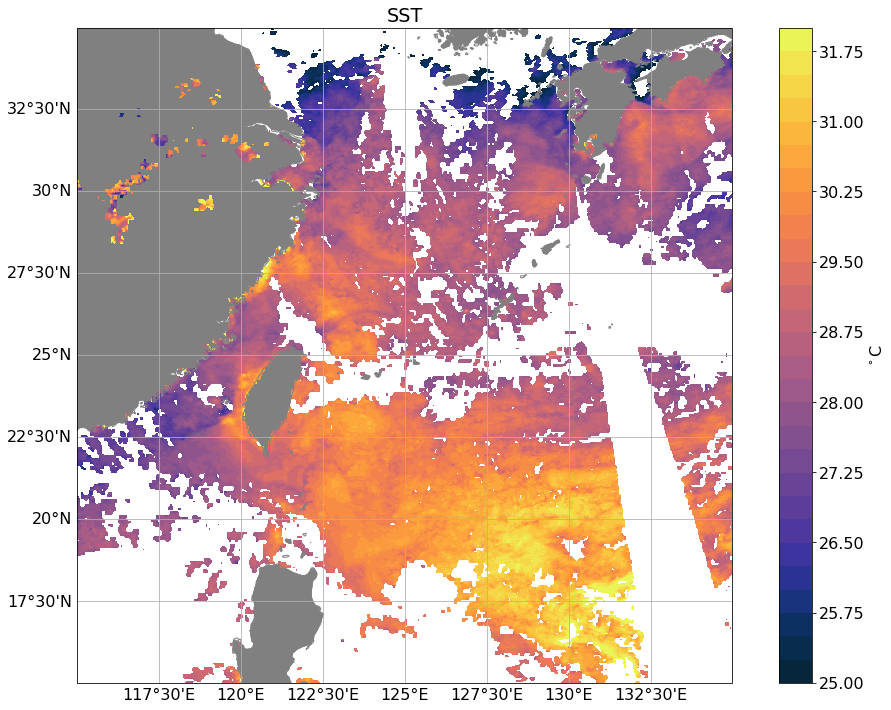

In [17]:
ds = xr.open_dataset("AQUA_MODIS.20020820.L3m.DAY.SST.x_sst.nc" )
ds

fig = plt.figure(figsize=(13, 10))
ax = fig.add_axes([0, 0.02, 1, 0.91], projection=ccrs.PlateCarree())

ax.coastlines(resolution='10m', color = 'gray')
ax.set_title('SST');
#ax.gridlines(draw_labels = True, dms = True)
gl = ax.gridlines(draw_labels=True, dms=True)
gl.top_labels = False
gl.right_labels = False
#-----------------------------
#ax.add_patch(Rectangle((130, 27), 2, 2)) #draw the shape ((lat, lon), length, width)
ax.add_feature(cf.LAND, color = 'gray')
#plt.plot(121.49, 22.6621, 'go')

vrange = [25,32] # colorbar range
vstep = 0.25 # colorbar step
levels = np.arange(vrange[0], vrange[1]+vstep, vstep)
plt.contourf(ds.lon, ds.lat,ds.sst, levels, cmap=cmocean.cm.thermal)
cbar = plt.colorbar()
cbar.ax.set_ylabel('$^\circ$C')

In [4]:
# INDEXING
# define arrays from dataset
latitude=np.array(ds.lat)
longitude=np.array(ds.lon)
SST=np.array(ds.sst)
# subselect data
#
# latitude
latmin=21
latmax=22
ilat = np.array(np.where((latitude >= latmin) & (latitude <= latmax))) # indeces to 'latitude' with values between (latmin,latmax)
print(ilat)
print(ilat.shape) # ilat has size (n_rows, n_columns) with n_rows=1
print(ilat[0,0:4]) # subselect first 5 values in ilat
print(latitude[ilat]) # get latitude at indeces in ilat
print(latitude[ilat[0,0:4]]) # get latitude at first 5 values in ilat
#
# longitude
lonmin=129
lonmax=130.5
ilon = np.array(np.where((longitude >= lonmin) & (longitude <= lonmax))) # indeces to 'latitude' with values between (latmin,latmax)
print(ilon)
print(ilon.shape)
print(longitude[ilon])
#
# sst in rectangle [ilat,ilon]
sst_rectangle=SST[np.ix_(ilat[0,:],ilon[0,:])] # subselect sst in rectangle at indeces ilat, ilon
print(sst_rectangle.shape)
print(np.nanmean(sst_rectangle)) # calculates mean ignoring NaNs (NaN=not a number; equivalent to white patches on map where there is no data)
print(np.nanstd(sst_rectangle)) # calculates standard deviation ignoring NaNs

NameError: name 'ds' is not defined

[[0.47916603 0.4375     0.39583206 0.35416603 0.3125     0.27083206
  0.22916603 0.1875     0.14583206 0.10416603 0.0625     0.02083206
  0.02083397 0.0625     0.10416794 0.14583397 0.1875     0.22916794
  0.27083397 0.3125     0.35416794 0.39583397 0.4375     0.47916794]]
11
21.520832
[26.74     26.654999 26.625    26.705    26.859999 26.84     26.769999
 26.789999 26.619999 26.63     26.595    26.605    26.654999 26.66
 26.904999 27.105    26.91     26.91     26.779999 26.779999 26.939999
 27.285    27.515    27.525    27.654999 27.595    27.68     27.695
 27.785    27.925    27.939999 27.9      27.64     27.9      27.925
 27.755   ]


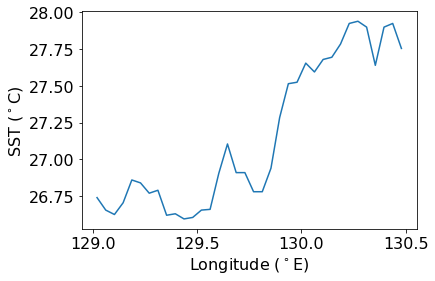

In [15]:
# sst section in rectangle as a function of longitude, at latitude lat_section
# get latitude and longitude in rectangle
latitude_rectangle=latitude[ilat];
longitude_rectangle=longitude[ilon];
lat_section=21.5 # reference latitude we want to slice across
lat_absdif=np.abs(latitude_rectangle-lat_section) # get absolute difference between latitude array and reference latitude
print(lat_absdif)
ilat_section=lat_absdif.argmin() # get index to minimum absolute difference, corresponding to closest value
print(ilat_section)
print(latitude_rectangle[0,ilat_section]) # get latitude at index for closest value to lat_section
# plot sst_rectangle at reference latitude, as a function of longitude
sst_rectangle_latsection=sst_rectangle[ilat_section,:]
print(sst_rectangle_latsection)
plt.plot(longitude_rectangle[0,:], sst_rectangle_latsection)
plt.xlabel('Longitude ($^\circ$E)')
plt.ylabel('SST ($^\circ$C)')
plt.show()

In [10]:
#Repeat steps above to plot SST as a function of Latitude instead
# sst section in rectangle as a function of longitude, at latitude lat_section
# get latitude and longitude in rectangle
latitude_rectangle=latitude[ilat];
longitude_rectangle=longitude[ilon];
lon_section=125 # reference longitude we want to slice across
lon_absdif=np.abs(longitude_rectangle-lon_section) # get absolute difference between latitude array and reference latitude
print(lon_absdif)
ilon_section=lon_absdif.argmin() # get index to minimum absolute difference, corresponding to closest value
print(ilon_section)
print(longitude_rectangle[0,ilon_section]) # get longitude at index for closest value to lat_section
# plot sst_rectangle at reference longitude, as a function of latitude
sst_rectangle_lonsection=sst_rectangle[ilon_section,:]
print(sst_rectangle_lonsection)
plt.plot(longitude_rectangle[0,:], sst_rectangle_lonsection)
plt.xlabel('Latitude ($^\circ$E)')
plt.ylabel('SST ($^\circ$C)')
plt.show()

NameError: name 'latitude' is not defined

In [11]:
# INDEXING
# define arrays from dataset
latitude=np.array(ds.lat)
longitude=np.array(ds.lon)
SST=np.array(ds.sst)
# subselect data
#
# latitude
latmin=21
latmax=22
ilat = np.array(np.where((latitude >= latmin) & (latitude <= latmax))) # indeces to 'latitude' with values between (latmin,latmax)
print(ilat)
print(ilat.shape) # ilat has size (n_rows, n_columns) with n_rows=1
print(ilat[0,0:4]) # subselect first 5 values in ilat
print(latitude[ilat]) # get latitude at indeces in ilat
print(latitude[ilat[0,0:4]]) # get latitude at first 5 values in ilat
#
# longitude
lonmin=129
lonmax=130.5
ilon = np.array(np.where((longitude >= lonmin) & (longitude <= lonmax))) # indeces to 'latitude' with values between (latmin,latmax)
print(ilon)
print(ilon.shape)
print(longitude[ilon])
#
# sst in rectangle [ilat,ilon]
sst_rectangle=SST[np.ix_(ilat[0,:],ilon[0,:])] # subselect sst in rectangle at indeces ilat, ilon
print(sst_rectangle.shape)
print("Mean: ")
print(np.nanmean(sst_rectangle)) # calculates mean ignoring NaNs (NaN=not a number; equivalent to white patches on map where there is no data)
print("Standard Deviation:")
print(np.nanstd(sst_rectangle)) # calculates standard deviation ignoring NaNs

NameError: name 'ds' is not defined

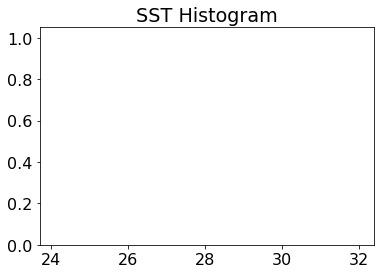

In [11]:
plt.hist(sst_rectangle_lonsection, bins = 10, range = (29, 32))
plt.title("SST Histogram")
plt.plot(np.mean(sst_rectangle_lonsection), 1)
plt.show()

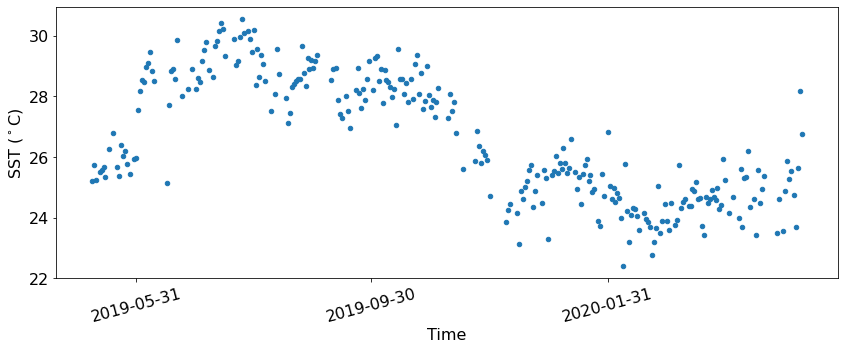

In [25]:
# define northern rectangle latitude:
latmin=23
latmax=24

#define southern rectangle latitude



# longitude
lonmin=129
lonmax=130.5

import os.path

allSSTrectangle = []  # store SST
alldates = []         # store all timestamps for SST in rectangle

# for i in dates:
for i in dates[7000:7365]: # restrict to shorter period
#for i in dates:            # all data

    file_name = f"AQUA_MODIS.{i}.L3m.DAY.SST.x_sst.nc"   # construct string with file name
    if os.path.isfile(file_name):                             # if file exists
        ds = xr.open_dataset(file_name)
    
        # define arrays from dataset
        latitude=np.array(ds.lat)
        longitude=np.array(ds.lon)
        SST=np.array(ds.sst)

        # subselect data
        ilat = np.array(np.where((latitude >= latmin) & (latitude <= latmax))) # indeces to 'latitude' with values between (latmin,latmax)
        ilon = np.array(np.where((longitude >= lonmin) & (longitude <= lonmax))) # indeces to 'latitude' with values between (latmin,latmax)
    
        # sst in rectangle [ilat,ilon]
        sst_rectangle=SST[np.ix_(ilat[0,:],ilon[0,:])] # subselect sst in rectangle at indeces ilat, ilon
        
        # get mean sst in rectangle and corresponding date
        if np.all(sst_rectangle!=sst_rectangle): # if all values are NaN (comparing two NaN values will always return False)
            m=np.NaN
        else: 
            m=np.nanmean(sst_rectangle)        
        if np.isfinite(m):
            allSSTrectangle.append(m)        
            # date corresponding to sst in rectangle
            alldates.append(i)
        
#     ----------------------------------------------------------------------------------------------------------------------

# plot timeseries
# Prepare data for visualization - create dataframe in pandas
import pandas as pd
time=pd.to_datetime(alldates, format="%Y%m%d")
timeseries={'sst':allSSTrectangle, 'time':time}
# Load data into DataFrame
df = pd.DataFrame(data = timeseries);
# Draw a scatter plot
xlt=pd.date_range(start=time[0], end=time[len(time)-1], freq='4M') # xlabel ticks location: from first to last time with delta=4 months
df.plot.scatter(x = 'time', y = 'sst', s = 20, figsize = (14,5), rot=15, xticks=xlt, ylabel='SST ($^\circ$C)', xlabel='Time'); # s=size of scatter markers (circles); figsize in inches; rot= rotation of xtick labels in degrees

#Learn to plot two timeseries on the same figure
#Take an SST Rectangle north of Green Island, and South of Green Island, or plot the difference between them and analyze
#Add a linearizaiton
#Compare seasonal temperatures by averageing the summer months

In [5]:
# define rectangle bounds:
# latitude

latmin1=21
latmax1=22

latmin2 = 23
latmax2 = 24

# longitude
lonmin=129
lonmax=130.5



import os.path

allSSTrectangle = []  # store SST
alldates = []         # store all timestamps for SST in rectangle

# for i in dates:
for i in dates[3000:4000]: # restrict to shorter period
#for i in dates:            # all data

    file_name = f"AQUA_MODIS.{i}.L3m.DAY.SST.x_sst.nc"   # construct string with file name
    if os.path.isfile(file_name):                             # if file exists
        ds = xr.open_dataset(file_name)
    
        # define arrays from dataset
        latitude=np.array(ds.lat)
        longitude=np.array(ds.lon)
        SST=np.array(ds.sst)

        # subselect data
        ilat1 = np.array(np.where((latitude >= latmin1) & (latitude <= latmax1))) # indeces to 'latitude' with values between (latmin,latmax)
        ilat2 = np.array(np.where((latitude >= latmin2) & (latitude <= latmax2)))
        ilon = np.array(np.where((longitude >= lonmin) & (longitude <= lonmax))) # indeces to 'latitude' with values between (latmin,latmax)
        
        
        # sst in rectangle [ilat,ilon]
        sst_rectangle=SST[np.ix_(ilat[0,:],ilon[0,:])] # subselect sst in rectangle at indeces ilat, ilon
        
        # get mean sst in rectangle and corresponding date
        if np.all(sst_rectangle!=sst_rectangle): # if all values are NaN (comparing two NaN values will always return False)
            m=np.NaN
        else: 
            m=np.nanmean(sst_rectangle)        
        if np.isfinite(m):
            allSSTrectangle1.append(m)        
            # date corresponding to sst in rectangle
            alldates.append(i)
        
#     ----------------------------------------------------------------------------------------------------------------------

# plot timeseries
# Prepare data for visualization - create dataframe in pandas
import pandas as pd
time=pd.to_datetime(alldates, format="%Y%m%d")
timeseries1={'sst':allSSTrectangle1, 'time':time}
timeseries2={'sst':allSSTrectangle2, 'time':time}
# Load data into DataFrame
df1 = pd.DataFrame(data = timeseries1);
df2 = pd.DataFrame(data = timeseries2);
# Draw a scatter plot
ax1 = df.timeseries1.plot(color = 'red', label = 'Time Series 1')
ax2 = df.timeseries2.plot(color = 'blue', label = 'Time Series 2')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)

plt.show()


#xlt=pd.date_range(start=time[0], end=time[len(time)-1], freq='4M') # xlabel ticks location: from first to last time with delta=4 months



#df.plot.scatter(x = 'time', y = 'sst', s = 20, figsize = (14,5), rot=15, xticks=xlt, ylabel='SST ($^\circ$C)', xlabel='Time'); # s=size of scatter markers (circles); figsize in inches; rot= rotation of xtick labels in degrees


#Learn to plot two timeseries on the same figure
#Take an SST Rectangle north of Green Island, and South of Green Island, or plot the difference between them and analyze
#Add a linearizaiton
#Compare seasonal temperatures by averageing the summer months

NameError: name 'ilat' is not defined

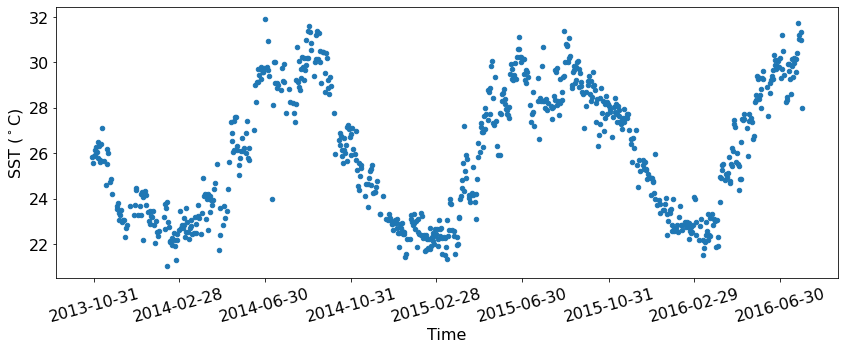

In [20]:
# define northern rectangle latitude:
latmin=23
latmax=24

#define southern rectangle latitude



# longitude
lonmin=129
lonmax=130.5

import os.path

allSSTrectangle = []  # store SST
alldates = []         # store all timestamps for SST in rectangle

# for i in dates:
for i in dates[5000:6000]: # restrict to shorter period
#for i in dates:            # all data

    file_name = f"AQUA_MODIS.{i}.L3m.DAY.SST.x_sst.nc"   # construct string with file name
    if os.path.isfile(file_name):                             # if file exists
        ds = xr.open_dataset(file_name)
    
        # define arrays from dataset
        latitude=np.array(ds.lat)
        longitude=np.array(ds.lon)
        SST=np.array(ds.sst)

        # subselect data
        ilat = np.array(np.where((latitude >= latmin) & (latitude <= latmax))) # indeces to 'latitude' with values between (latmin,latmax)
        ilon = np.array(np.where((longitude >= lonmin) & (longitude <= lonmax))) # indeces to 'latitude' with values between (latmin,latmax)
    
        # sst in rectangle [ilat,ilon]
        sst_rectangle=SST[np.ix_(ilat[0,:],ilon[0,:])] # subselect sst in rectangle at indeces ilat, ilon
        
        # get mean sst in rectangle and corresponding date
        if np.all(sst_rectangle!=sst_rectangle): # if all values are NaN (comparing two NaN values will always return False)
            m=np.NaN
        else: 
            m=np.nanmean(sst_rectangle)        
        if np.isfinite(m):
            allSSTrectangle.append(m)        
            # date corresponding to sst in rectangle
            alldates.append(i)
        
#     ----------------------------------------------------------------------------------------------------------------------

# plot timeseries
# Prepare data for visualization - create dataframe in pandas
import pandas as pd
time=pd.to_datetime(alldates, format="%Y%m%d")
timeseries={'sst':allSSTrectangle, 'time':time}
# Load data into DataFrame
df = pd.DataFrame(data = timeseries);
# Draw a scatter plot
xlt=pd.date_range(start=time[0], end=time[len(time)-1], freq='4M') # xlabel ticks location: from first to last time with delta=4 months
df.plot.scatter(x = 'time', y = 'sst', s = 20, figsize = (14,5), rot=15, xticks=xlt, ylabel='SST ($^\circ$C)', xlabel='Time'); # s=size of scatter markers (circles); figsize in inches; rot= rotation of xtick labels in degrees

#Learn to plot two timeseries on the same figure
#Take an SST Rectangle north of Green Island, and South of Green Island, or plot the difference between them and analyze
#Add a linearizaiton
#Compare seasonal temperatures by averageing the summer months

KeyError: 'timeseries'